In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating all possible set of n*n spin configuration and save it into {out} parameter
# O(2^{n*n})

def generator(out,i,j,inp,n=5):
    if(j >= n) :
        j = 0
        i += 1
    if(i >= n) :
        inp0 = np.copy(inp)
        out.append(inp0)
        return 
    generator(out,i,j+1,inp,n)
    inp[i,j] *= -1
    generator(out,i,j+1,inp,n)
    inp[i,j] *= -1

In [3]:
# without J coefficient
# Column 단위로 계산, 즉 첫 번째 row에서 세로방향으로 interaction을 다 더함

def naive_calc_H(spin_conf):
    res = 0
    N = len(spin_conf[0]) # Lattice number
    for i in range(N):
        for j in range(N-1): # Correlation이니까 마지막 점은 제외
            res += spin_conf[i][j]*spin_conf[i][j+1]
        if(i == 0) : continue
        for j in range(N):
            if(j==0) :
                res += spin_conf[i][j]*(spin_conf[i-1][j] + spin_conf[i-1][j+1])
            elif(j==N-1) :
                res += spin_conf[i][j]*(spin_conf[i-1][j] + spin_conf[i-1][j-1])
            else :
                res += spin_conf[i][j]*(spin_conf[i-1][j] + spin_conf[i-1][j-1] + spin_conf[i-1][j+1])
    return res*-1

# 이렇게 하니까 그래프가 너무 쪼그라드는데??
def naive_calc_H2(spin_conf): # Without diagonal response
    res = 0
    N = len(spin_conf[0]) # Lattice number
    for i in range(N):
        for j in range(N-1): # Correlation이니까 마지막 점은 제외
            res += spin_conf[i][j]*spin_conf[i][j+1]
        if(i == 0) : continue
        for j in range(N):
            if(j==0) :
                res += spin_conf[i][j]*(spin_conf[i-1][j])
            elif(j==N-1) :
                res += spin_conf[i][j]*(spin_conf[i-1][j])
            else :
                res += spin_conf[i][j]*(spin_conf[i-1][j])
    return res*-1

In [4]:
# without J coefficient

def naive_calc_H3(sc): #spin configuration array
    res = 0
    N = len(sc[0])
    for i in range(N*N):
        nn = i + 1
        if(nn >= N*N) : nn -= N*N
        sum = sc[nn%N][int(nn/N)]

        nn = i - 1
        if(nn < 0) : nn += N*N
        sum += sc[nn%N][int(nn/N)]
        # print(nn%N,int(nn/N))
        
        nn = i + N
        if(nn >= N*N) : nn -= N*N
        sum += sc[nn%N][int(nn/N)]

        nn = i - N
        if(nn < 0) : nn += N*N
        sum += sc[nn%N][int(nn/N)]
        
        # print(sum, i)
        res += sum*sc[i%N][int(i/N)]
    # print(sc)
    # print()

    return res*-1

In [5]:
# Assume that J/k = 1 for this case

def partition_function(H,T,J=1):
    # k = 1.38E-23 # boltzman constant
    k = 1
    return np.exp(-1*J*H/(k*T))

In [6]:
# Generating all possible set of n*n spin configuration and save it into {out} parameter
# O(2^{n*n})
# Up/down symmetry를 위해서 첫 항을 1로 고정
# result 2**(n*n-1)개의 element를 가진 list

def generator_sym(out,inp,n=5,i=0,j=1):
    if(j >= n) :
        j = 0
        i += 1
    if(i >= n) :
        inp0 = np.copy(inp)
        out.append(inp0)
        # Hout.append(naive_calc_H(inp0))
        return 
    # generator_sym(out,Hout,inp,n,i,j+1)
    generator_sym(out,inp,n,i,j+1)
    inp[i,j] *= -1
    # generator_sym(out,Hout,inp,n,i,j+1)
    generator_sym(out,inp,n,i,j+1)
    inp[i,j] *= -1

# N*N Lattice configuration generator -> Easy to use

def genNN(N):
    res = []
    Hres = []
    # generator_sym(res,Hres,np.ones((N,N),dtype=np.int0),N)
    generator_sym(res,np.ones((N,N),dtype=np.int0),N)
    # return np.array(res), np.array(Hres)
    return np.array(res) 

def gen_sum_si(inp):
    return np.sum(np.sum(inp,axis=2),axis=1)

In [7]:
L22 = genNN(2)
print(len(L22),2**4,2**4)
# print(L55)

8 16 16


In [8]:
HL22 = []
for i in L22:
    HL22.append(naive_calc_H3(i))
HL22 = np.array(HL22)

In [9]:
HL22

array([-16,   0,   0,   0,   0,   8,   8,   0], dtype=int64)

In [10]:
ls = []
for i in range(25):
    T = 0.2*(i+1)
    ZL22 = partition_function(HL22,T)
    # print(ZL22)
    ls.append(np.sum(gen_sum_si(L22) * ZL22)/np.sum(ZL22))

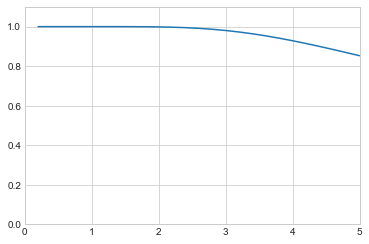

In [11]:
T = [(i+1)*(0.2) for i in range(25)]
y = ls/max(ls)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

----

In [12]:
L55 = genNN(5)
print(len(L55),2**24,2**25)
# print(L55)
# about 70s

16777216 16777216 33554432


In [13]:
HL55 = []
for i in L55:
    HL55.append(naive_calc_H3(i))
HL55 = np.array(HL55)
# about 500s

In [14]:
mL55 = []
_N = 50
for i in range(_N):
    T = (5/_N)*(i+2)
    ZL55 = partition_function(HL55,T)
    # print(ZL22)
    mL55.append(np.sum(gen_sum_si(L55) * ZL55)/np.sum(ZL55))

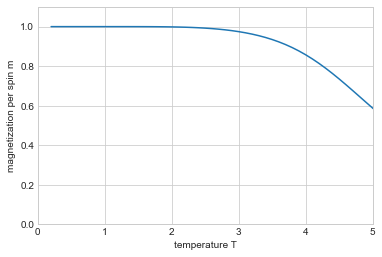

In [15]:
T = [(i+2)*(5/_N) for i in range(_N)]
y = mL55/max(mL55)

plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T,y)

plt.ylabel('magnetization per spin m')
plt.xlabel('temperature T')
plt.show()